In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
folder = "/content/drive/MyDrive/Colab Notebooks/DATASET/cancer/"

In [15]:
df_train = pd.read_csv(folder + 'train.csv')
df_test = pd.read_csv(folder + 'test.csv')

In [16]:
print(df_train.shape)
print(df_test.shape)

(400, 14574)
(401, 14573)


In [17]:
df_train.isnull().sum().sum()

np.int64(482296)

In [18]:
df_train.columns[df_train.isnull().any()]

Index(['gene_1', 'gene_3', 'gene_5', 'gene_7', 'gene_8', 'gene_9', 'gene_10',
       'gene_11', 'gene_13', 'gene_14',
       ...
       'gene_20634', 'gene_20635', 'gene_20636', 'gene_20637', 'gene_20638',
       'gene_20639', 'gene_20640', 'gene_20641', 'gene_20642', 'Class'],
      dtype='object', length=14573)

In [19]:
# Calculating the fraction of missing values per column
missing_frac = df_train.isnull().mean()

# Filter columns where missing fraction is greater than 0.15 (15%)
cols_with_many_nans = missing_frac[missing_frac > 0.15]

# Show the result
print("Columns with > 15% missing values:")
print(cols_with_many_nans)

Columns with > 15% missing values:
Class    0.625
dtype: float64


In [20]:
df_train['Class'].isnull().sum()

np.int64(250)

In [21]:
df_labeled = df_train[df_train['Class'].notnull()]
df_unlabeled = df_train[df_train['Class'].isnull()]

print(df_labeled.shape)
print(df_unlabeled.shape)

(150, 14574)
(250, 14574)


In [22]:
# prepare train set
X_labeled = df_labeled.drop(['Class', 'Id'], axis=1)
y_labeled = df_labeled['Class']

X_unlabeled = df_unlabeled.drop(['Class', 'Id'], axis=1)

id_labeled = df_labeled['Id']
id_unlabeled = df_labeled['Id']

# Prepare test set
X_test = df_test.drop(columns=['Id'])
id_test = df_test['Id']

In [23]:
X_labeled.describe()

,gene_1,gene_3,gene_5,gene_7,gene_8,gene_9,gene_10,gene_11,gene_13,gene_14,...,gene_20633,gene_20634,gene_20635,gene_20636,gene_20637,gene_20638,gene_20639,gene_20640,gene_20641,gene_20642
count,144.000000,145.000000,130.000000,137.000000,137.000000,141.000000,139.000000,139.000000,134.000000,138.000000,...,141.000000,134.000000,141.000000,136.000000,129.000000,137.000000,138.000000,133.000000,136.000000,139.000000
mean,0.105503,0.174310,0.122216,-0.033608,0.055635,0.013400,0.050186,0.045033,0.109700,-0.152896,...,0.001744,-0.115262,-0.101433,-0.027796,0.037297,0.067865,-0.115622,-0.059375,-0.004146,-0.015942
std,1.149516,1.125815,1.089985,0.988165,1.010969,0.937667,0.910798,1.037524,1.289071,1.070622,...,1.070241,1.038718,1.016230,1.058892,0.975136,1.061892,1.040832,1.043010,0.930787,1.033081
min,-2.268993,-1.897882,-3.255536,-2.853971,-5.737839,-4.079731,-1.672210,-1.798695,-3.206376,-5.329013,...,-2.999819,-4.137839,-3.406653,-3.624227,-3.221455,-2.652422,-4.904563,-4.187460,-2.437325,-2.448014
25%,-0.574300,-0.518498,-0.340409,-0.581869,-0.319298,-0.402070,-0.486414,-0.578032,-0.471524,-0.590828,...,-0.631511,-0.804145,-0.650281,-0.666380,-0.426220,-0.488057,-0.856349,-0.655772,-0.554579,-0.568422
50%,0.044354,-0.033128,-0.019993,-0.170794,-0.006563,-0.058927,-0.177461,-0.185885,-0.126604,-0.270686,...,0.004725,0.073459,0.125097,0.250630,0.054710,-0.060707,-0.000998,-0.047192,0.037276,-0.077423
75%,0.579953,0.713707,0.380052,0.431423,0.387882,0.323775,0.237998,0.442106,0.290939,0.210251,...,0.681192,0.610133,0.570470,0.750846,0.540747,0.513503,0.478038,0.534442,0.565863,0.592318
max,7.714353,6.495396,5.857435,4.697492,3.157187,5.116117,3.992366,4.962688,9.351831,4.598364,...,2.971938,2.163729,2.137905,2.223640,2.592613,5.228401,2.777126,3.186559,1.756369,6.022439


In [24]:
X_unlabeled.describe()

,gene_1,gene_3,gene_5,gene_7,gene_8,gene_9,gene_10,gene_11,gene_13,gene_14,...,gene_20633,gene_20634,gene_20635,gene_20636,gene_20637,gene_20638,gene_20639,gene_20640,gene_20641,gene_20642
count,233.000000,232.000000,229.000000,223.000000,229.000000,230.000000,232.000000,231.000000,228.000000,229.000000,...,223.000000,242.000000,230.000000,230.000000,229.000000,227.000000,229.000000,234.000000,226.000000,234.000000
mean,-0.029871,-0.050582,0.019415,0.068621,0.026485,-0.022167,-0.080981,-0.012606,-0.083978,-0.024108,...,0.068190,-0.022096,0.049693,0.030266,-0.114979,-0.052111,0.056072,0.054025,0.073322,0.026136
std,0.994686,0.908877,1.075597,1.054320,1.009642,0.823841,0.807459,0.964595,1.003845,1.029493,...,0.961455,1.043952,1.005027,1.061329,1.092028,1.086121,1.002925,0.992180,1.013036,1.040424
min,-3.155312,-2.419660,-6.138127,-2.564795,-5.599804,-3.409599,-2.229974,-2.168291,-3.983165,-3.838602,...,-2.552645,-3.700996,-3.306975,-3.274575,-4.304364,-2.987432,-3.476295,-3.041749,-3.224242,-2.838428
25%,-0.718557,-0.566600,-0.463286,-0.610373,-0.411992,-0.419122,-0.463044,-0.593196,-0.482497,-0.623405,...,-0.441875,-0.669138,-0.613021,-0.630500,-0.773174,-0.732030,-0.588712,-0.557550,-0.522172,-0.586267
50%,-0.195574,-0.096317,0.031430,-0.219415,-0.017611,0.036046,-0.203048,-0.210088,-0.198510,-0.152018,...,0.081271,0.189921,0.233577,0.142871,-0.079393,-0.176014,0.086642,0.084043,0.199132,0.046678
75%,0.620953,0.426667,0.444142,0.480579,0.504129,0.385394,0.192898,0.291032,0.169774,0.488385,...,0.634007,0.665769,0.655741,0.664043,0.433285,0.650244,0.581801,0.676709,0.701180,0.642994
max,3.645606,3.274889,4.849526,4.325736,4.776318,2.618120,4.028705,4.661099,8.279023,4.019024,...,2.557030,2.316328,3.187812,3.390511,4.039261,2.555754,3.267384,3.039536,2.630217,4.756270


In [25]:
print(X_labeled.isnull().sum().sum())
print(X_unlabeled.isnull().sum().sum())

180587
301459


In [26]:
# fill in the missing values with mean
X_labeled = X_labeled.fillna(X_labeled.mean())
X_unlabeled = X_unlabeled.fillna(X_unlabeled.mean())
# Fill missing values for test data
X_test = X_test.fillna(X_test.mean())

# after fill in the missing values checking for any NaN
print(X_labeled.isnull().sum().sum())
print(X_unlabeled.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0
0


Class
2    56
4    27
1    26
0    26
3    15
Name: count, dtype: int64


<Axes: xlabel='Class'>

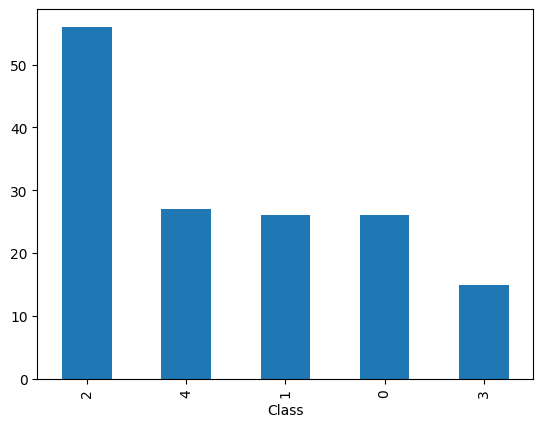

In [27]:
y_labeled = y_labeled.astype(int)
print(y_labeled.value_counts())
y_labeled.value_counts().plot(kind = 'bar')

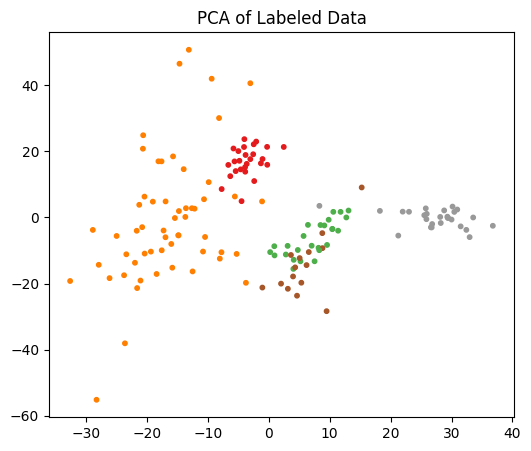

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_labeled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_labeled, cmap='Set1', s=10)
plt.title("PCA of Labeled Data")
plt.show()


In [29]:
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks

In [30]:
# Create the SMOTE and TomekLinks objects
smote = SMOTE(k_neighbors=5, random_state=42)
tomek = TomekLinks(sampling_strategy='majority', n_jobs=-1)

smote_tomek = SMOTETomek(
    sampling_strategy = 'not majority',
    smote = smote,
    tomek = tomek,
    n_jobs = -1,
    random_state=42
)
X_balanced, y_balanced = smote_tomek.fit_resample(X_labeled, y_labeled)

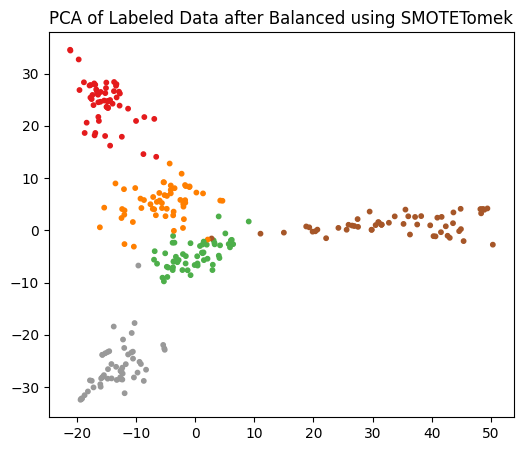

In [31]:
X_pca = pca.fit_transform(X_balanced)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_balanced, cmap='Set1', s=10)
plt.title("PCA of Labeled Data after Balanced using SMOTETomek")
plt.show()

In [32]:
X_balanced.shape

(280, 14572)

In [33]:
X_labeled.shape

(150, 14572)

<Axes: xlabel='Class'>

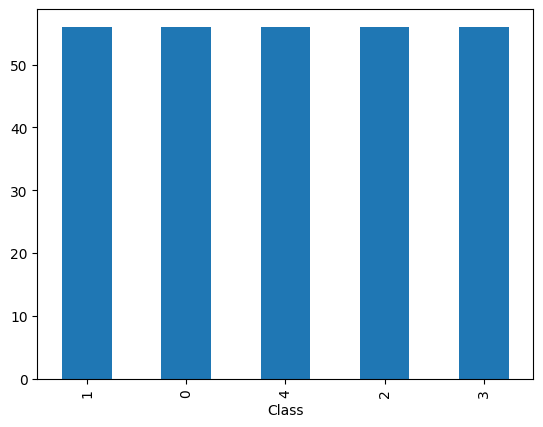

In [64]:
y_balanced.value_counts().plot(kind = 'bar')

In [65]:
pd.Series(y_balanced).value_counts().sort_index()


,count
Class,
0,56
1,56
2,56
3,56
4,56


In [69]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [72]:
# Feature Selection using RFE with Random Forest Classifier
scores = []
feature_range = [500, 1000, 2000, 3000, 5000, 5500]  # Trying different feature counts

for k in feature_range:
    rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
              n_features_to_select=k,
              step=10
              )
    X_rfe = rfe.fit_transform(X_balanced, y_balanced)

    # Evaluate with RandomForest
    score = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42),
                            X_rfe,
                            y_balanced,
                            cv=5
                            ).mean()

    scores.append(score)
    print(f"Features: {k}, CV Accuracy: {score:.4f}")

Features: 500, CV Accuracy: 0.9893
Features: 1000, CV Accuracy: 0.9929
Features: 2000, CV Accuracy: 0.9929


KeyboardInterrupt: 

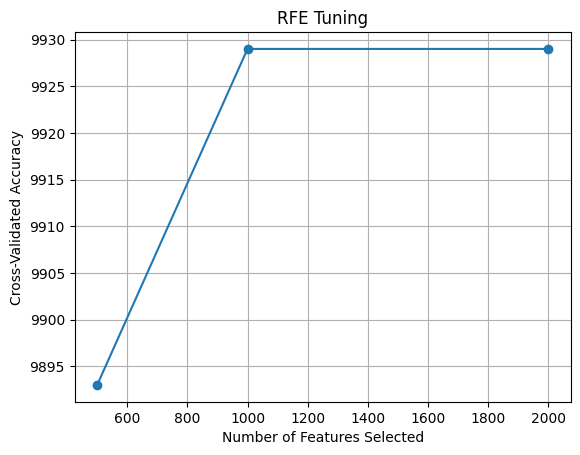

In [4]:
# Plot scores
feature_range = [500, 1000, 2000]
scores = [9893, 9929, 9929]
plt.plot(feature_range, scores, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated Accuracy")
plt.title("RFE Tuning")
plt.grid(True)
plt.show()

In [75]:
# Final RFE with RandomForest (k = 500)
final_rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                n_features_to_select=1000, step=50)
final_rfe.fit(X_balanced, y_balanced)

# Step 2: Transform labeled and unlabeled data
X_bal_selected = final_rfe.transform(X_balanced)
X_unl_selected = final_rfe.transform(X_unlabeled)

# Step 4: Select features from test using RFE
X_test_selected = final_rfe.transform(X_test)

# Step 5: Save selected feature names
selected_features = X_balanced.columns[final_rfe.support_]

In [76]:
print(X_bal_selected.shape)
print(X_unl_selected.shape)
print(X_test_selected.shape)

(280, 1000)
(250, 1000)
(401, 1000)


In [78]:
# Convert selected arrays to DataFrames
X_bal_selected_df = pd.DataFrame(X_bal_selected, columns=selected_features)
X_unl_selected_df = pd.DataFrame(X_unl_selected, columns=selected_features)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_features)

# Add class labels to X_bal_selected
X_bal_selected_df['Class'] = y_balanced.values

# Save to CSV files
X_bal_selected_df.to_csv("train_bal_sel.csv", index=False)
X_unl_selected_df.to_csv("train_unl_sel.csv", index=False)
X_test_selected_df.to_csv("X_test_sel.csv", index=False)

# Save selected feature names
pd.Series(selected_features).to_csv("selected_features_rf_1000.csv", index=False)

print("All datasets saved with IDs and class labels where applicable.")

All datasets saved with IDs and class labels where applicable.


In [80]:
from google.colab import files

# Download files to local to use them for model training
files.download("train_bal_sel.csv")
files.download("train_unl_sel.csv")
files.download("X_test_sel.csv")
files.download("selected_features_rf_1000.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>